In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species_info = pd.read_csv('species_info.csv')

observations = pd.read_csv('observations.csv')

In [4]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [6]:
print(species_info.value_counts(species_info.conservation_status))

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


In [3]:
print(species_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [8]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [33]:
species_info.fillna('No Intervention', inplace=True)
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

<Axes: xlabel='conservation_status', ylabel='count'>

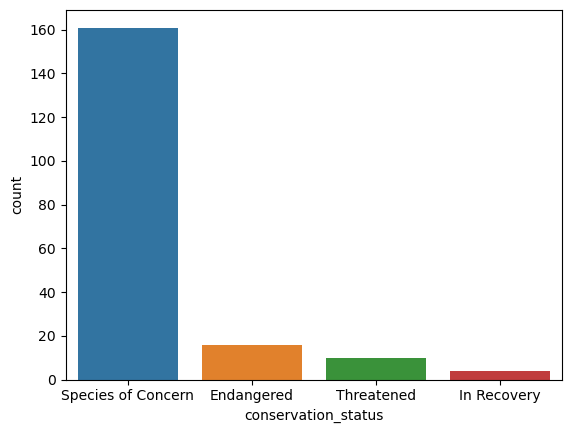

In [15]:
sns.countplot(x='conservation_status', data=species_info)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

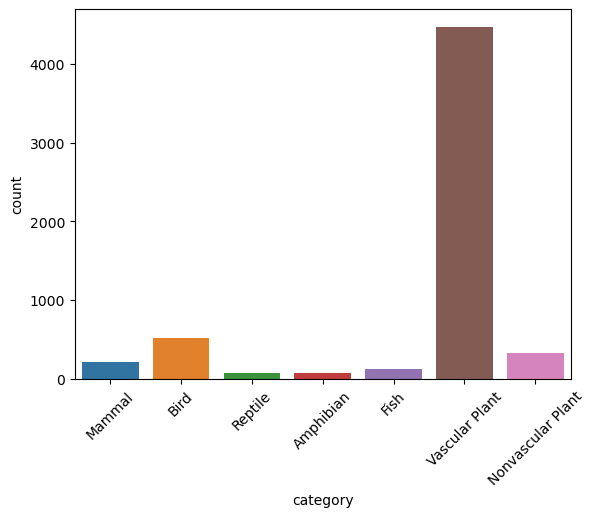

In [28]:
sns.countplot(x='category', data=species_info)
plt.xticks(rotation=45)

In [41]:
conservationStage = species_info[species_info.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

In [44]:
print(conservationStage.head())

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


The figure below shows the distribution of species accross the different conservation statuses.
This allows for the analysis of which species are most prominent in each category, for instance the Species of Concern category 
has birds being the highest count, as well as being the only category where reptiles are located.

Text(0, 0.5, 'Number of Species')

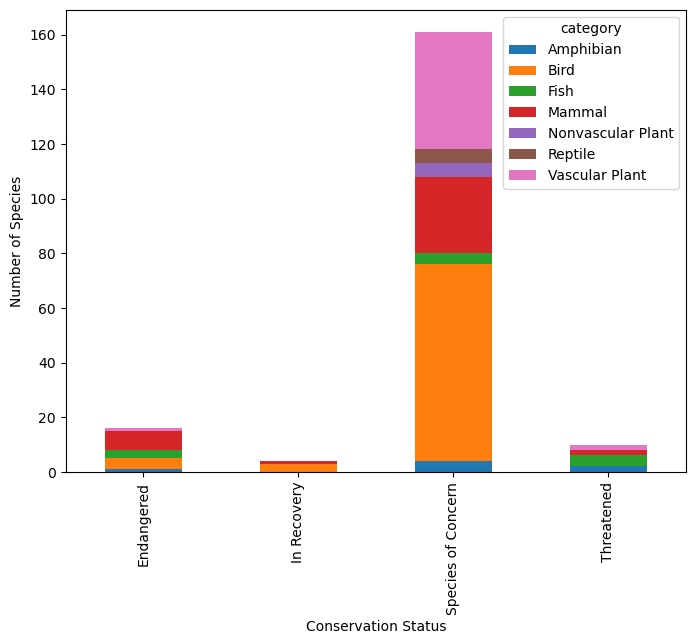

In [42]:
ax = conservationStage.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

<h3>Conclusion</h3>
<p>
    Out of the 5,824 species only 191 appeared with a concervation status. Meaning the majority of species within these parks require no intervention regarding their numbers.
</p>
<p>
    Out of the species with a concervation status birds had the highest presence. Meaning birds were more likely to be under a conservation status. 
</p>

<h3>Further Analysis</h3>
<p>
    If enough observations were made over time it would then be possible to analyze changes over time in regards to observations made as well as if species transition from one conservation status to another, this would provide a possible projection to be made about a species numbers. 
</p>